# Build Computer Vision Model
## Image Recognition - Classification

### 1. Load & Preprocess Image Dataset

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Flow training images in batches of 20 using train_datagen generator
train_generator = datagen.flow_from_directory(
    './samples',             # This is the source directory for training images
    target_size=(150, 150),  # All images will be resized to 150x150
    batch_size=20,
    class_mode='categorical', # Since we use categorical_crossentropy loss, we need binary labels
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    './samples',
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical',
    subset='validation'
)

Found 241 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


### 2. Build Deep Learning CNN Model

In [16]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

opt = RMSprop(learning_rate=1e-4)
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(3, activation='sigmoid')
    ])
    
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

### 3. Train, and Validate the Model

In [17]:
# Constant for epochs
EPOCHS = 20

# Create a new model
model = create_model()

# Train the model
history = model.fit(train_generator, epochs=EPOCHS, validation_data=validation_generator, verbose=2)

Epoch 1/20
13/13 - 10s - loss: 1.0445 - accuracy: 0.5643 - val_loss: 1.1374 - val_accuracy: 0.3333
Epoch 2/20
13/13 - 6s - loss: 0.8700 - accuracy: 0.6805 - val_loss: 0.6775 - val_accuracy: 0.8000
Epoch 3/20
13/13 - 6s - loss: 0.6209 - accuracy: 0.7884 - val_loss: 0.7218 - val_accuracy: 0.6333
Epoch 4/20
13/13 - 6s - loss: 0.4405 - accuracy: 0.8299 - val_loss: 0.3125 - val_accuracy: 0.9333
Epoch 5/20
13/13 - 6s - loss: 0.3340 - accuracy: 0.9336 - val_loss: 0.2281 - val_accuracy: 0.9500
Epoch 6/20
13/13 - 6s - loss: 0.2663 - accuracy: 0.9419 - val_loss: 0.1874 - val_accuracy: 1.0000
Epoch 7/20
13/13 - 6s - loss: 0.1963 - accuracy: 0.9461 - val_loss: 0.3025 - val_accuracy: 0.8000
Epoch 8/20
13/13 - 6s - loss: 0.1197 - accuracy: 0.9876 - val_loss: 0.0997 - val_accuracy: 1.0000
Epoch 9/20
13/13 - 6s - loss: 0.1675 - accuracy: 0.9502 - val_loss: 0.1192 - val_accuracy: 1.0000
Epoch 10/20
13/13 - 6s - loss: 0.0560 - accuracy: 1.0000 - val_loss: 0.0832 - val_accuracy: 1.0000
Epoch 11/20
13/13 

### 4. Plot Accuracy and Loss / Epochs

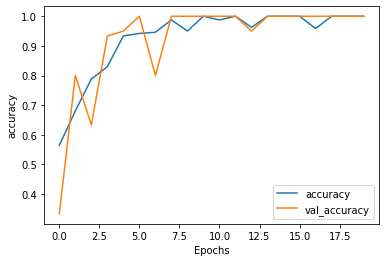

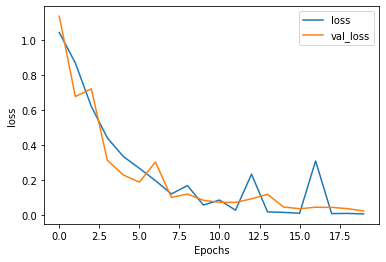

In [18]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### 5. Test and Try

In [28]:
from PIL import Image, ImageOps
import numpy as np

image = Image.open('./samples/Chess/63.jpg').convert('RGB')
image = ImageOps.fit(image, (150, 150), Image.Resampling.LANCZOS)

#turn the image into a numpy array
image_array = np.asarray(image)

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 150, 150, 3), dtype=np.float32)
data[0] = (image_array.astype(np.float32) / 255.0) - 1 # Load Normalized image

labels = dict((v, k) for k,v in train_generator.class_indices.items())
prediction = model.predict(data)
index = np.argmax(prediction)

class_name = labels[index]
confidence_score = prediction[0][index]

print('Class:', class_name, end=', ')
print('Confidence score:', confidence_score)

Class: Lego, Confidence score: 0.99998
